# Analysis of pre-stroke modified Rankin Scale

Distributions of mRS (modified Rankin Scale) are shown for:
* All patients
* Ischaemic and haemorrhagic stroke
* Ischaemic patients with NIHSS of 0-10 (surrogate for non large vessel occlusions)
* Ischaemic patients with NIHSS of 11+ (surrogate for large vessel occlusions)

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Change default colour scheme:
plt.style.use('seaborn-colorblind')

# import data
data = pd.read_csv(
    './../data/2019-11-04-HQIP303-Exeter_MA.csv', low_memory=False)

## Get distribution of mRS before stroke for all patients

In [2]:
count, division = np.histogram(data['S2RankinBeforeStroke'], bins=range(0,7))

results = pd.DataFrame()
results.index.name='mRS'
results['all'] = count / count.sum()
results

,all
mRS,
0,0.533043
1,0.156302
2,0.107781
3,0.121422
4,0.063581
5,0.017870


## Get distribution of mRS before stroke by stroke type

In [3]:
# Infarction
mask = data['S2StrokeType'] == 'Infarction'
count, division = np.histogram(
    data[mask]['S2RankinBeforeStroke'], bins=range(0,7))
results['infarction'] = count / count.sum()

# Haemorrhage
mask = data['S2StrokeType'] == 'Primary Intracerebral Haemorrhage'
count, division = np.histogram(
    data[mask]['S2RankinBeforeStroke'], bins=range(0,7))
results['haemorrhage'] = count / count.sum()

# Show results
results

,all,infarction,haemorrhage
mRS,,,
0,0.533043,0.534923,0.521374
1,0.156302,0.157958,0.144905
2,0.107781,0.108075,0.106007
3,0.121422,0.119199,0.137272
4,0.063581,0.062649,0.068735
5,0.017870,0.017196,0.021706


## mRS for ischaemic stroke, by stroke severity

In [4]:
# NIHSS 0-10 is a surrogate for non large vessel occlusions
mask = data['S2NihssArrival'] < 11 
count, division = np.histogram(
    data[mask]['S2RankinBeforeStroke'], bins=range(0,7))
results['nlvo'] = count / count.sum()

# NIHSS 11+ is a surrogate for non large vessel occlusions
mask = data['S2NihssArrival'] > 10
count, division = np.histogram(
    data[mask]['S2RankinBeforeStroke'], bins=range(0,7))
results['lvo'] = count / count.sum()

# Show results
results

,all,infarction,haemorrhage,nlvo,lvo
mRS,,,,,
0,0.533043,0.534923,0.521374,0.582881,0.417894
1,0.156302,0.157958,0.144905,0.162538,0.142959
2,0.107781,0.108075,0.106007,0.103440,0.118430
3,0.121422,0.119199,0.137272,0.102223,0.164211
4,0.063581,0.062649,0.068735,0.041973,0.113775
5,0.017870,0.017196,0.021706,0.006945,0.042731


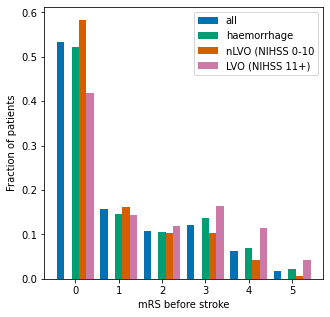

In [5]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
width = 0.17
x = results.index
ax.bar(x - width * 2, results['all'], width, label='all')
ax.bar(x, results['haemorrhage'], width, label='haemorrhage')
ax.bar(x + width, results['nlvo'], width, label='nLVO (NIHSS 0-10')
ax.bar(x + width * 2, results['lvo'], width, label='LVO (NIHSS 11+)')
ax.set_ylabel('Fraction of patients')
ax.set_xlabel('mRS before stroke')
ax.legend()
plt.savefig('./output/mrs_before_by_stroke_type.jpg', dpi=300)
plt.show()

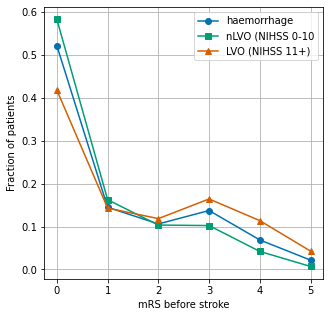

In [6]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
width = 0.17
x = results.index
#ax.plot(results['all'], label='all')
ax.plot(results['haemorrhage'], marker='o', label='haemorrhage')
ax.plot(results['nlvo'], marker = 's', label='nLVO (NIHSS 0-10')
ax.plot(results['lvo'], marker = '^', label='LVO (NIHSS 11+)')
ax.grid()
ax.set_ylabel('Fraction of patients')
ax.set_xlabel('mRS before stroke')
ax.legend()
plt.savefig('./output/mrs_before_by_stroke_type.jpg', dpi=300)
plt.show()